In [107]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [119]:
%run load_data.py

In [120]:
# Load an image and get its label
img_id = 10
filepath='/Users/zhampel/insight/project/data/mnist/pngs/training/'
img, label = load_img(path_to_data=filepath, img_id=img_id, file_type='png')

0.0 0.99607843
3


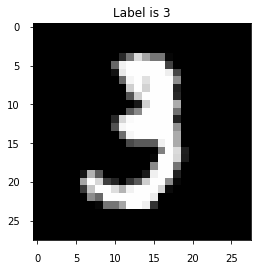

In [121]:
# Display the image
print(np.min(img), np.max(img))
print(label)
plt.title('Label is {label}'.format(label=label))
plt.imshow(img, cmap='gray')
plt.show()

/Users/zhampel/py-venv/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


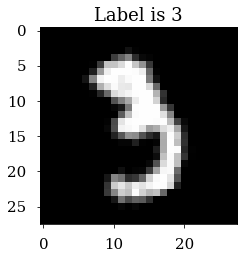

In [133]:
# Rotate the image and display
rot_img = rotate_image(img, 25.)
plt.title('Label is {label}'.format(label=label))
plt.imshow(rot_img, cmap='gray')
plt.show()

In [134]:
%run plots.py

<Figure size 432x288 with 0 Axes>

/Users/zhampel/py-venv/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


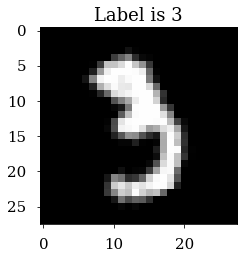

In [135]:
plot_image(rot_img, cmap='gray', label=label)

In [ ]:
#x_train, y_train, x_test, y_test = load_data('mnist')

In [ ]:
#print(x_train.shape)
#print(y_train.shape)
#num_classes = y_train.shape[1]
#print("Number of Classes: ", num_classes)